Preprocess Training Data:
Training:
Epoch 1/25
50000/50000 [==============================] - 6s 115us/sample - loss: 1.6889 - acc: 0.3752
Epoch 2/25
50000/50000 [==============================] - 5s 106us/sample - loss: 1.2576 - acc: 0.5463
Epoch 3/25
50000/50000 [==============================] - 5s 106us/sample - loss: 1.0720 - acc: 0.6171
Epoch 4/25
50000/50000 [==============================] - 5s 105us/sample - loss: 0.9572 - acc: 0.6600
Epoch 5/25
50000/50000 [==============================] - 5s 106us/sample - loss: 0.8734 - acc: 0.6904
Epoch 6/25
50000/50000 [==============================] - 5s 106us/sample - loss: 0.8110 - acc: 0.7145
Epoch 7/25
50000/50000 [==============================] - 5s 109us/sample - loss: 0.7540 - acc: 0.7323
Epoch 8/25
50000/50000 [==============================] - 5s 107us/sample - loss: 0.7085 - acc: 0.7489
Epoch 9/25
50000/50000 [==============================] - 5s 105us/sample - loss: 0.6717 - acc: 0.7631
Epoch 10/25
50000/50000 [============

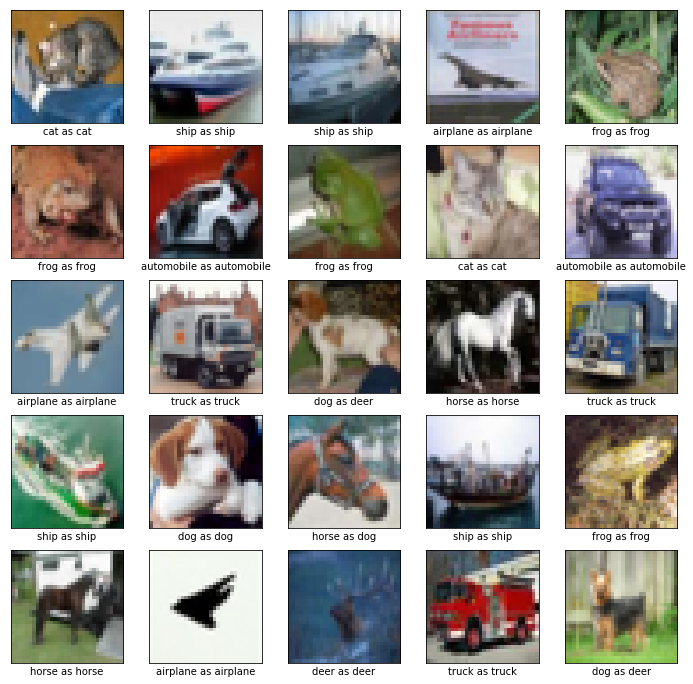

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import time 

start = time.time()

# set the random seeds to make sure your results are reproducible
from numpy.random import seed
seed(1)

from tensorflow import set_random_seed
set_random_seed(1)

cifar10 = keras.datasets.cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.device('/gpu:0'):
  # Create model
  model = keras.models.Sequential([
      keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
      keras.layers.Conv2D(64, (3, 3)),
      keras.layers.MaxPooling2D(2, 2),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
      #keras.layers.Conv2D(64, (3, 3)),
      keras.layers.MaxPooling2D(2, 2),
      keras.layers.Dropout(0.1),
      keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
      keras.layers.Conv2D(64, (3, 3)),
      keras.layers.MaxPooling2D(2, 2),
      keras.layers.Dropout(0.3),
      keras.layers.Flatten(),
      keras.layers.Dense(1024, activation=tf.nn.relu),
      keras.layers.Dense(512, activation=tf.nn.relu),
      keras.layers.Dense(10, activation=tf.nn.softmax)])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print('Preprocess Training Data:')
X_train = X_train /255.0

print('Training:')
with tf.device('/gpu:0'):
  model.fit(X_train, y_train, batch_size=250, epochs=50)

print('Preprocess Testing Data:')
X_test = X_test /255.0
print('Testing:')
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:{}, Test Loss:{} '.format(test_acc, test_loss))

print("=====================================================")
end = time. time()
print(end - start)
print("=====================================================")

print("Predicting the class for some sample test data:")
prob_result = model.predict(X_test[0:25])
class_result = prob_result.argmax(axis = -1)
print(class_result.shape)
plt.figure("CFAR10 sample test results",figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    label = '{} as {}'.format(class_names[y_test[i,0]], class_names[class_result[i]])
    plt.xlabel(label)
plt.show()
